In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.duplicated().any()

False

There are no null values or duplicate values

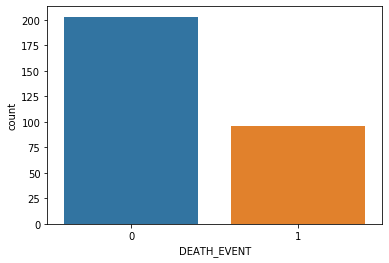

In [8]:
sns.countplot(df['DEATH_EVENT'],data=df)

## Visualizing the distribution of variables

Text(0.5, 1.0, 'Age Distribution against death event')

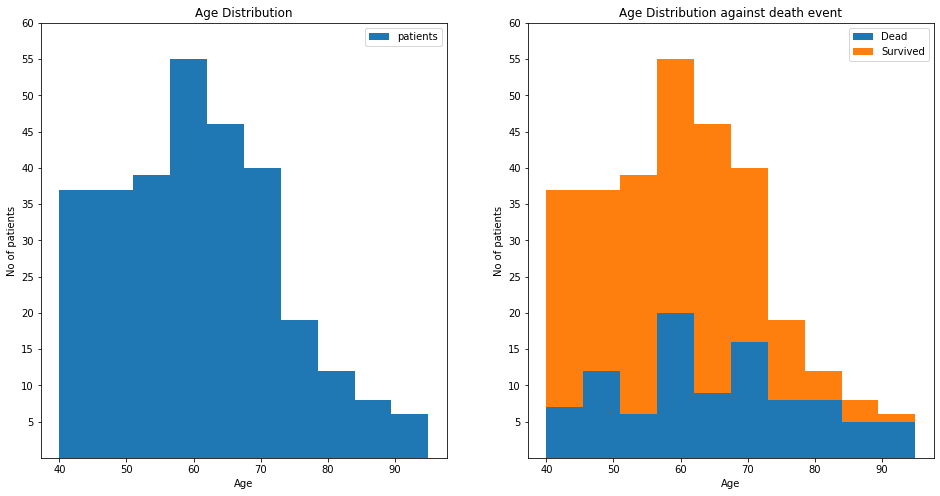

In [9]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['age'],label='patients')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('No of patients')
ax[0].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[0].legend()
ax[0].set_title('Age Distribution')
ax[1].hist(x=[df[df['DEATH_EVENT']==1]['age'],df[df['DEATH_EVENT']==0]['age']],stacked=True,label=['Dead','Survived'])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('No of patients')
ax[1].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[1].legend()
ax[1].set_title('Age Distribution against death event')

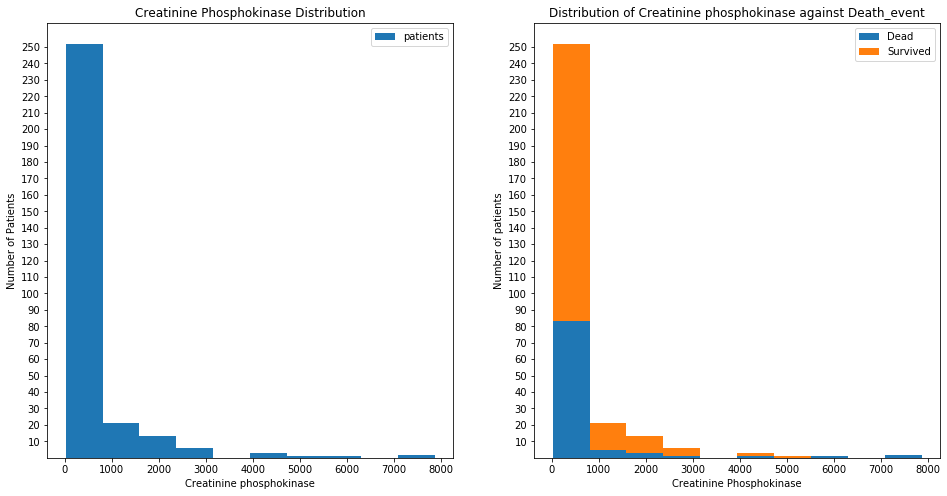

In [10]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['creatinine_phosphokinase'],label = 'patients')
ax[0].set_xlabel('Creatinine phosphokinase')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])
ax[0].legend()
ax[0].set_title('Creatinine Phosphokinase Distribution')
ax[1].hist(x=[df[df['DEATH_EVENT']==1]['creatinine_phosphokinase'],df[df['DEATH_EVENT']==0]['creatinine_phosphokinase']],stacked=True,label=['Dead','Survived'])
ax[1].set_xlabel('Creatinine Phosphokinase')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])
ax[1].set_title('Distribution of Creatinine phosphokinase against Death_event')
ax[1].legend()

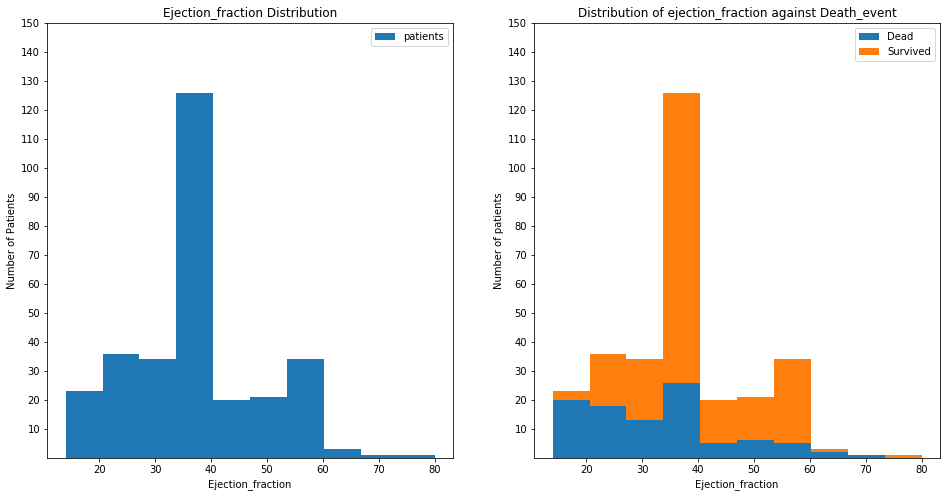

In [11]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['ejection_fraction'], label = 'patients')
ax[0].set_xlabel('Ejection_fraction')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Ejection_fraction Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['ejection_fraction'],df[df['DEATH_EVENT']==0]['ejection_fraction']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('Ejection_fraction')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[1].set_title('Distribution of ejection_fraction against Death_event')
ax[1].legend()

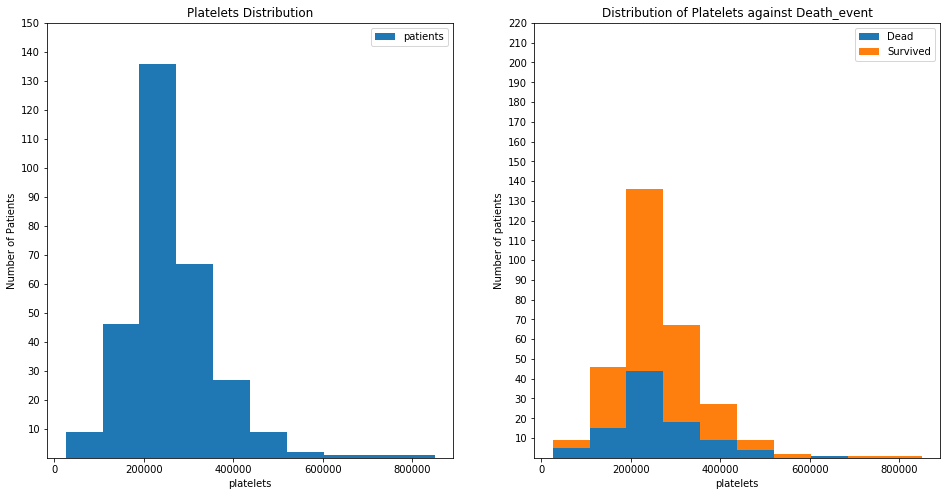

In [12]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['platelets'], label = 'patients')
ax[0].set_xlabel('platelets')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Platelets Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['platelets'],df[df['DEATH_EVENT']==0]['platelets']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('platelets')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks(([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]))
ax[1].set_title('Distribution of Platelets against Death_event')
ax[1].legend()

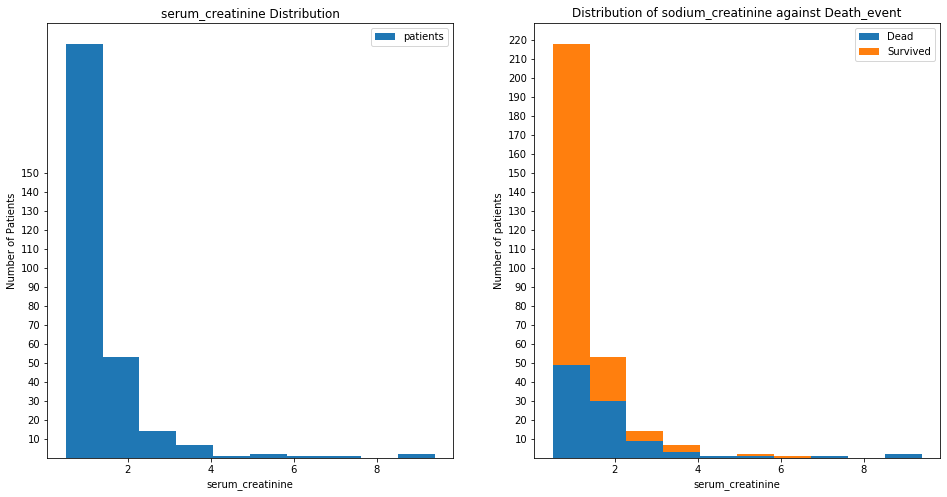

In [13]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['serum_creatinine'], label = 'patients')
ax[0].set_xlabel('serum_creatinine')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('serum_creatinine Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['serum_creatinine'],df[df['DEATH_EVENT']==0]['serum_creatinine']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('serum_creatinine')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks(([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]))
ax[1].set_title('Distribution of sodium_creatinine against Death_event')
ax[1].legend()

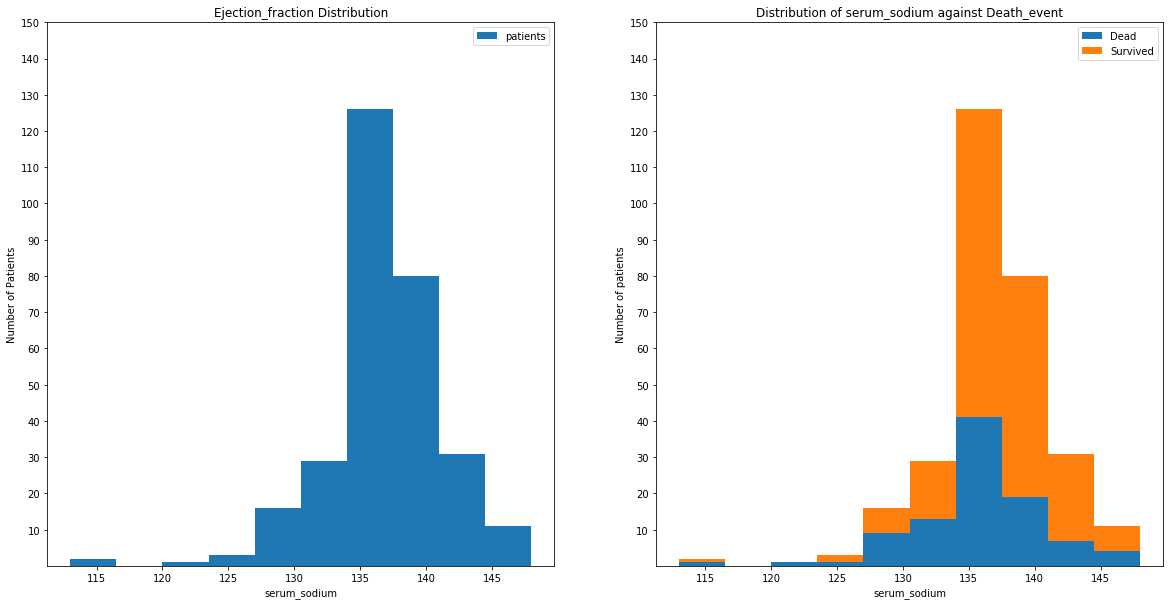

In [14]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].hist(df['serum_sodium'], label = 'patients')
ax[0].set_xlabel('serum_sodium')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Ejection_fraction Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['serum_sodium'],df[df['DEATH_EVENT']==0]['serum_sodium']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('serum_sodium')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[1].set_title('Distribution of serum_sodium against Death_event')
ax[1].legend()

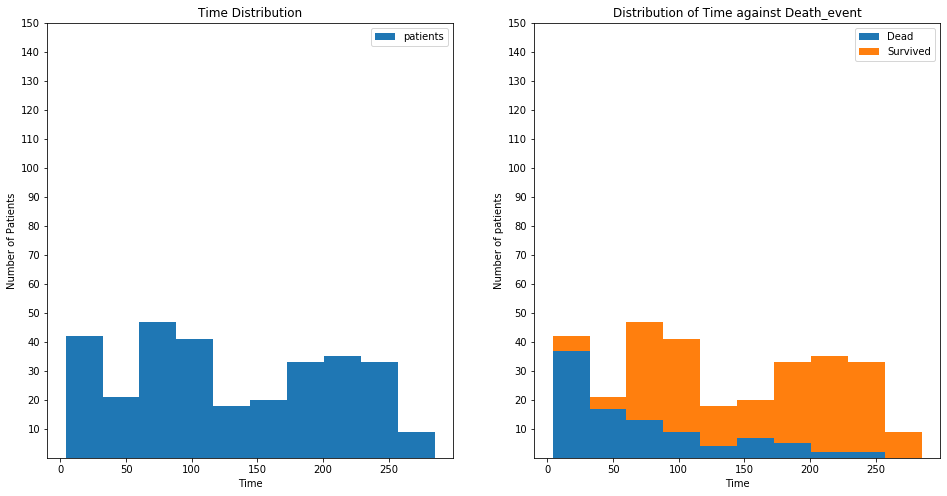

In [15]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['time'], label = 'patients')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Time Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['time'],df[df['DEATH_EVENT']==0]['time']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[1].set_title('Distribution of Time against Death_event')
ax[1].legend()

In [16]:
d1=df[(df['DEATH_EVENT']==0)&(df['sex']==1)]
d2=df[(df['DEATH_EVENT']==1)&(df['sex']==1)]
d3=df[(df['DEATH_EVENT']==0)&(df['sex']==0)]
d4=df[(df['DEATH_EVENT']==1)&(df['sex']==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1,values=values1,hole=0.4,name='Gender'),1,1)
fig.add_trace(go.Pie(labels=label2,values=values2,hole=0.4,name="GENDER VS DEATH_EVENT"),1, 2)

# Use `hole` to create a donut-like pie chart
#fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

In [17]:
#Diabetes Distribution 
d1=df[(df['DEATH_EVENT']==0)&(df['diabetes']==1)]
d2=df[(df['DEATH_EVENT']==1)&(df['diabetes']==1)]
d3=df[(df['DEATH_EVENT']==0)&(df['diabetes']==0)]
d4=df[(df['DEATH_EVENT']==1)&(df['diabetes']==0)]

label1 = ["Diabetes","No Diabetes"]
label2 = ['Diabetes - Survived','Diabetes - Died', "No Diabetes -  Survived", "No Diabetes - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1,values=values1,hole=0.4,name='Diabetes'),1,1)
fig.add_trace(go.Pie(labels=label2,values=values2,hole=0.4,name="Diabetes VS DEATH_EVENT"),1, 2)

# Use `hole` to create a donut-like pie chart
#fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="Diabetes DISTRIBUTION IN THE DATASET  \
                   Diabetes VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Diabetes', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='Diabetes VS DEATH_EVENT', x=0.85, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

In [18]:
#high_blood_pressure Distribution 
d1=df[(df['DEATH_EVENT']==0)&(df['high_blood_pressure']==1)]
d2=df[(df['DEATH_EVENT']==1)&(df['high_blood_pressure']==1)]
d3=df[(df['DEATH_EVENT']==0)&(df['high_blood_pressure']==0)]
d4=df[(df['DEATH_EVENT']==1)&(df['high_blood_pressure']==0)]

label1 = ["High BP","No High BP"]
label2 = ['High BP - Survived','High BP - Died', "No High BP -  Survived", "No High BP - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1,values=values1,hole=0.4,name='High BP'),1,1)
fig.add_trace(go.Pie(labels=label2,values=values2,hole=0.4,name="High BP VS DEATH_EVENT"),1, 2)

# Use `hole` to create a donut-like pie chart
#fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="High BP DISTRIBUTION IN THE DATASET  \
                   High BP VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='High BP', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='High BP VS DEATH_EVENT', x=0.85, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

In [19]:
#Smoking Distribution 
d1=df[(df['DEATH_EVENT']==0)&(df['smoking']==1)]
d2=df[(df['DEATH_EVENT']==1)&(df['smoking']==1)]
d3=df[(df['DEATH_EVENT']==0)&(df['smoking']==0)]
d4=df[(df['DEATH_EVENT']==1)&(df['smoking']==0)]

label1 = ["Smoking","No Smoking"]
label2 = ['Smoking - Survived','Smoking - Died', "No Smoking -  Survived", "No Smoking - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1,values=values1,hole=0.4,name='Smoking'),1,1)
fig.add_trace(go.Pie(labels=label2,values=values2,hole=0.4,name="Smoking VS DEATH_EVENT"),1, 2)

# Use `hole` to create a donut-like pie chart
#fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="Smoking DISTRIBUTION IN THE DATASET  \
                   Smoking VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Smoking', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='Smoking VS DEATH_EVENT', x=0.85, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

### Feature Selection

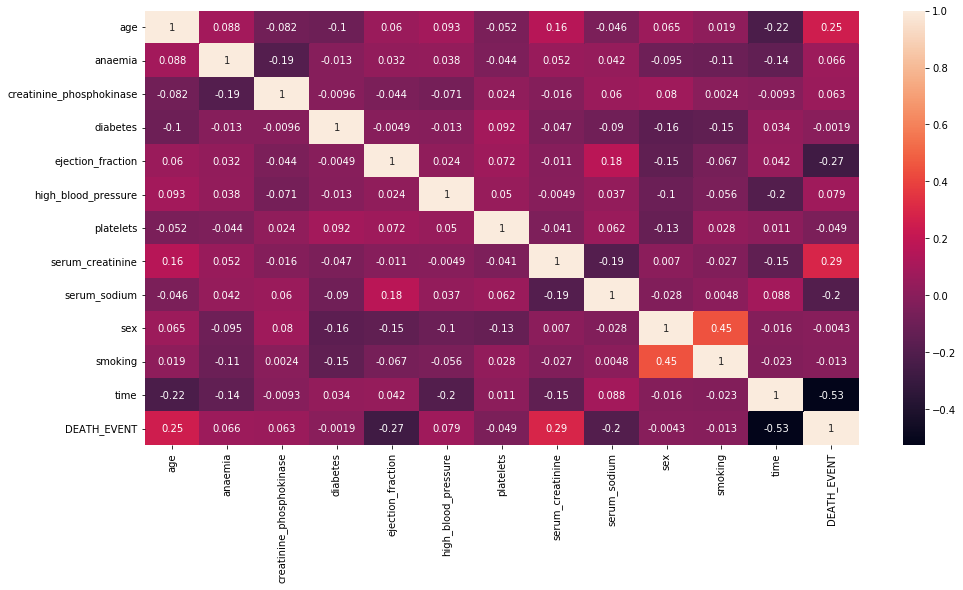

In [20]:
# Heat map Distribution
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [21]:
df.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

In [22]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
et.fit(X,y)


ExtraTreesClassifier()

In [24]:
et.feature_importances_

array([0.09087398, 0.02448626, 0.07557015, 0.03141378, 0.13061228,
       0.02368185, 0.07322882, 0.11069901, 0.08639489, 0.02612844,
       0.02678581, 0.30012473])

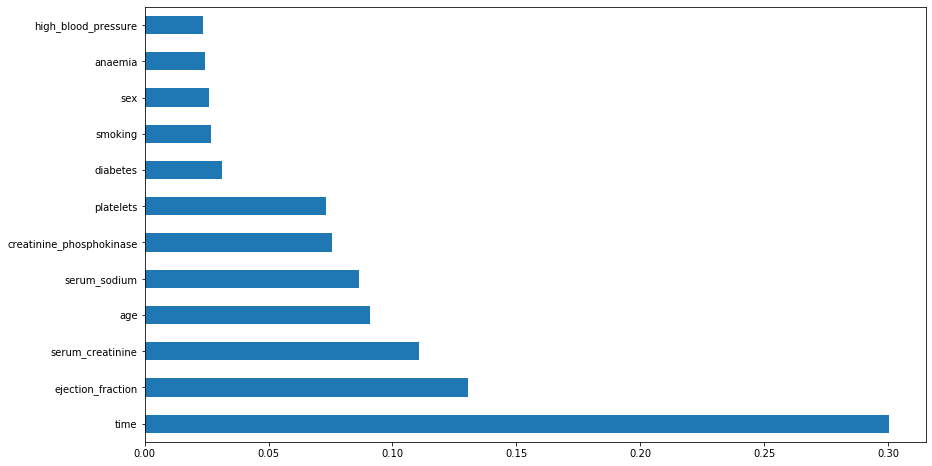

In [25]:
plt.figure(figsize=(14,8))
feat_importances=pd.Series(et.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [26]:
#We shall select only 4 features
X = df[['time', 'ejection_fraction', 'serum_creatinine','age']]
y = df['DEATH_EVENT']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
lpred=classifier.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
confusion_matrix(y_test,lpred)

array([[35,  2],
       [11, 12]], dtype=int64)

In [37]:
print(classification_report(y_test,lpred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        37
           1       0.86      0.52      0.65        23

    accuracy                           0.78        60
   macro avg       0.81      0.73      0.75        60
weighted avg       0.80      0.78      0.77        60



###  Mmm...Our accuracy and F1  score is  less Lets try some outlier removal process and check and then we can explore further models

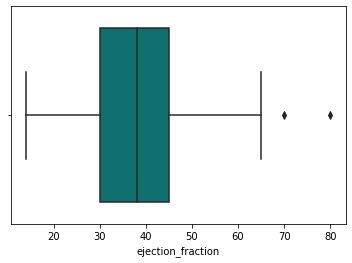

In [38]:
sns.boxplot(x = df.ejection_fraction, color = 'teal')
plt.show()


In [39]:
# We can see there are two outliers. Lets remove them
df[df['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [40]:
#Creating new dataframe removing outliers
df1=df[df['ejection_fraction']<70]

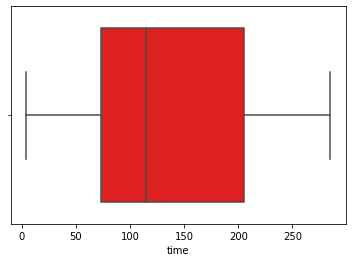

In [42]:
sns.boxplot(x=df1.time, color = 'red')
plt.show()


There are no outliers in time

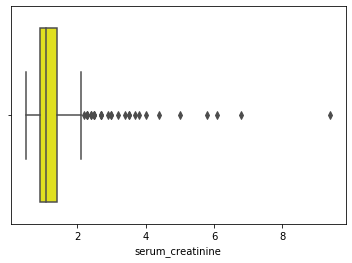

In [43]:
# Boxplot for serum_creatinine
sns.boxplot(x=df1.serum_creatinine, color = 'yellow')
plt.show()


Before dealing with outliers we require knowledge about the outlier, the dataset and possibly some domain knowledge.

Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that
exist within each feature, removing outliers becomes tricky.

With little research we could see that all the values in serum_creatinine falls in possible range of values. So they are not outliers. 
They are actual data points that helps in predicting DEATH_EVENT. 


In [68]:
#We shall select only 4 features
X = df1[['time', 'ejection_fraction', 'serum_creatinine','age']]
y = df1['DEATH_EVENT']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [70]:
scaler=StandardScaler()

In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

In [73]:
logpred=classifier.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
confusion_matrix(y_test,logpred)

array([[40,  3],
       [ 4, 13]], dtype=int64)

In [76]:
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.81      0.76      0.79        17

    accuracy                           0.88        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.88      0.88      0.88        60



Thats good..After removing outliers our accuracy and F1 score has increased significantly

In [77]:
#KNeighbors Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

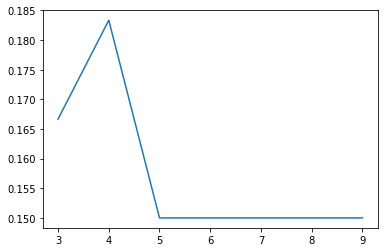

In [78]:
#Choosing K value
list1=[]
for k in range(3,10):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    errors=1-accuracy_score(y_test,y_pred)
    list1.append(errors)
plt.plot(list(range(3,10)),list1)
plt.show()

In [63]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [79]:
kpred=classifier.predict(X_test)

In [80]:
confusion_matrix(y_test,kpred)

array([[39,  4],
       [ 5, 12]], dtype=int64)

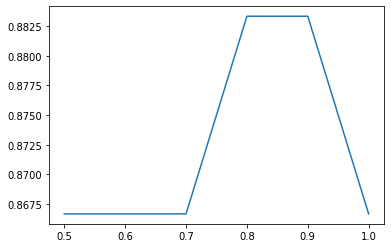

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()


In [83]:
from sklearn.svm import SVC
classifier = SVC(C = 0.8, random_state=0, kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=0.8, random_state=0)

In [85]:
y_pred = classifier.predict(X_test)


In [86]:
confusion_matrix(y_test,y_pred)

array([[40,  3],
       [ 4, 13]], dtype=int64)

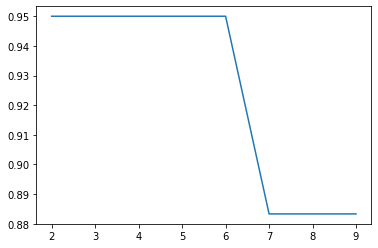

In [133]:
list5 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list5.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list5)
plt.show()


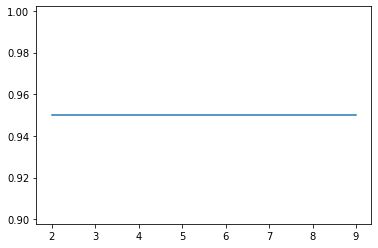

In [163]:
list6 = []
for depth in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = 3,max_depth=depth, random_state=0, criterion='entropy')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list6.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list6)
plt.show()


In [165]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)


In [166]:
confusion_matrix(y_test,dt_pred)

array([[43,  0],
       [ 3, 14]], dtype=int64)

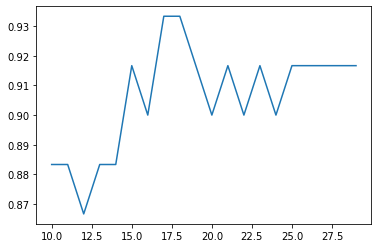

In [90]:
from sklearn.ensemble import RandomForestClassifier
list2=[]
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list2.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list2)
plt.show()


In [110]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 17,criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
rf_pred=classifier.predict(X_test)

In [111]:
confusion_matrix(y_test,rf_pred)

array([[41,  2],
       [ 2, 15]], dtype=int64)

[11:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

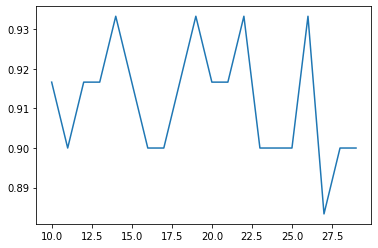

In [129]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list3 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list3.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list3)
plt.show()


In [130]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 14, max_depth=12, subsample=0.7)
classifier.fit(X_train,y_train)


[11:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=14, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
xg_pred=classifier.predict(X_test)

In [132]:
confusion_matrix(y_test,xg_pred)

array([[41,  2],
       [ 2, 15]], dtype=int64)

#### Comparitively Decision tree Classifier works best in our case so lets choose that as our final model

In [142]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)


In [143]:
confusion_matrix(y_test,dt_pred)

array([[43,  0],
       [ 3, 14]], dtype=int64)

In [144]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.82      0.90        17

    accuracy                           0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60



We have got an accuracy of 95% and f1-score of 90%

In [167]:
import pickle

In [168]:
pickle.dump(dt_clf,open('model.pkl', 'wb'))

In [169]:
pickle.dump(scaler,open('scaler.pkl','wb'))